In [74]:

import pandas as pd
import sys

sys.path.insert(1, '../rule_lib')

from rule_benchmark import *

In [75]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
FOLDERS = ["approach1", "approach2"]

In [77]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  19
Number of input variables:  4
Number of output variables:  3

approach1/:

Container_DataLayout:
Train: 0.9949256977165639
Test: 0.9354838709677419

Traversal:
Train: 0.974004424778761
Test: 0.8896103896103896

Newton 3:
Train: 1.0
Test: 1.0


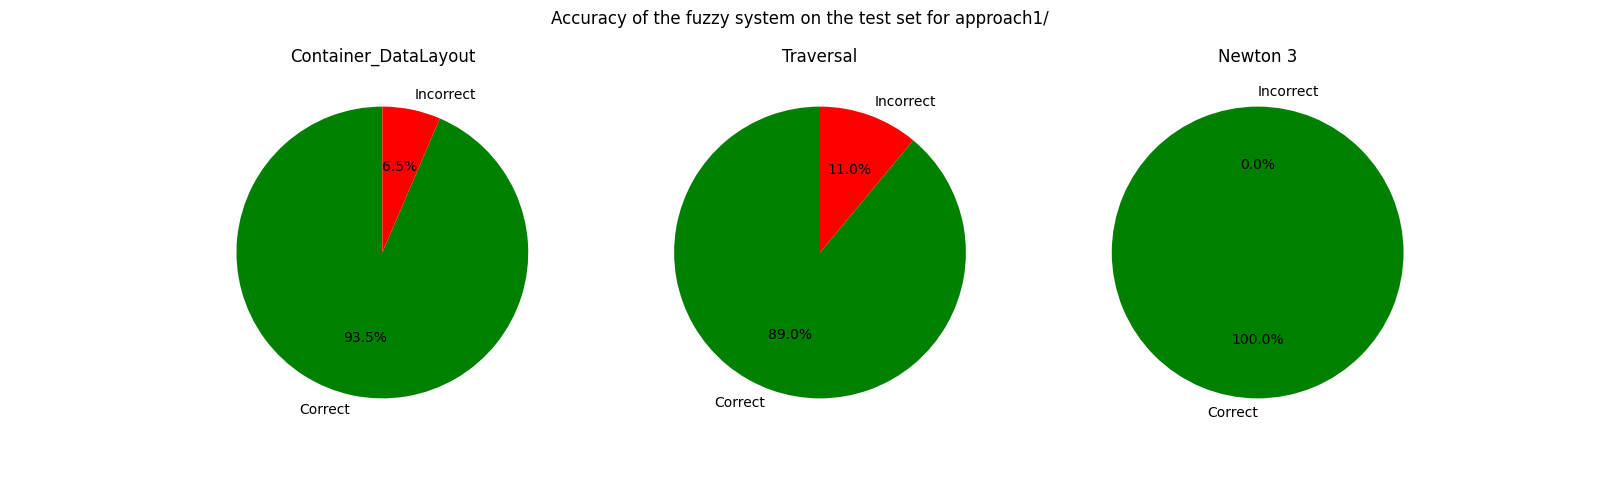

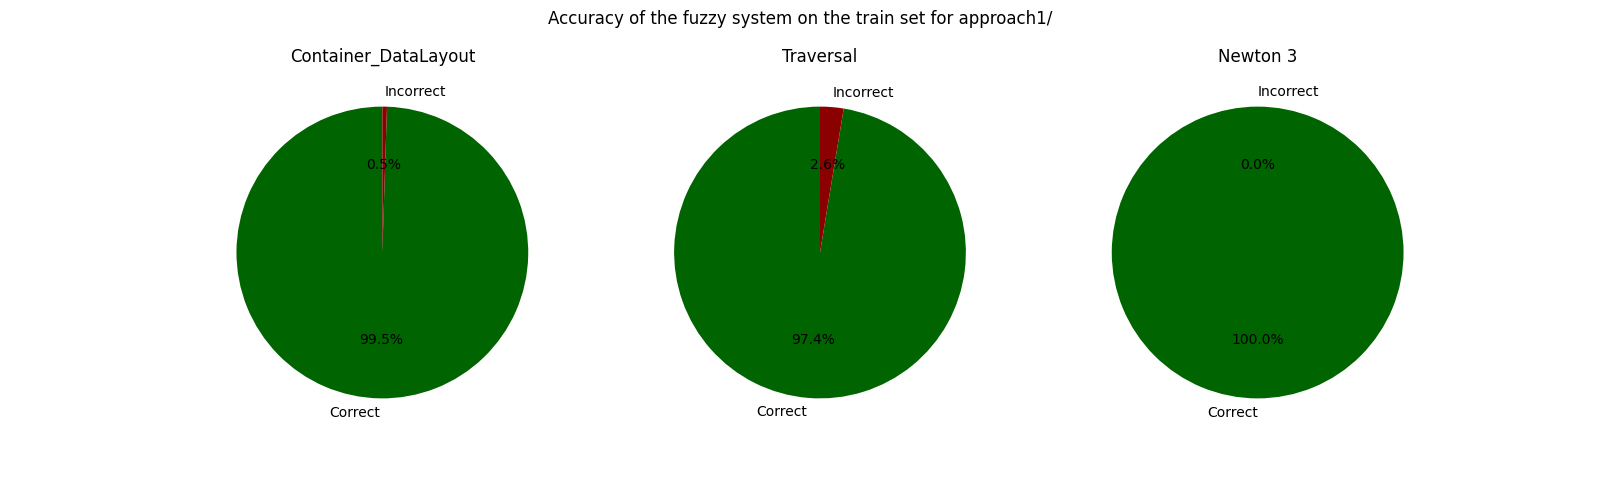

Number of rules:  19
Number of input variables:  4
Number of output variables:  3

approach2/:

Container_DataLayout:
Train: 0.9967081199707388
Test: 0.94

Traversal:
Train: 0.974004424778761
Test: 0.8896103896103896

Newton 3:
Train: 1.0
Test: 1.0


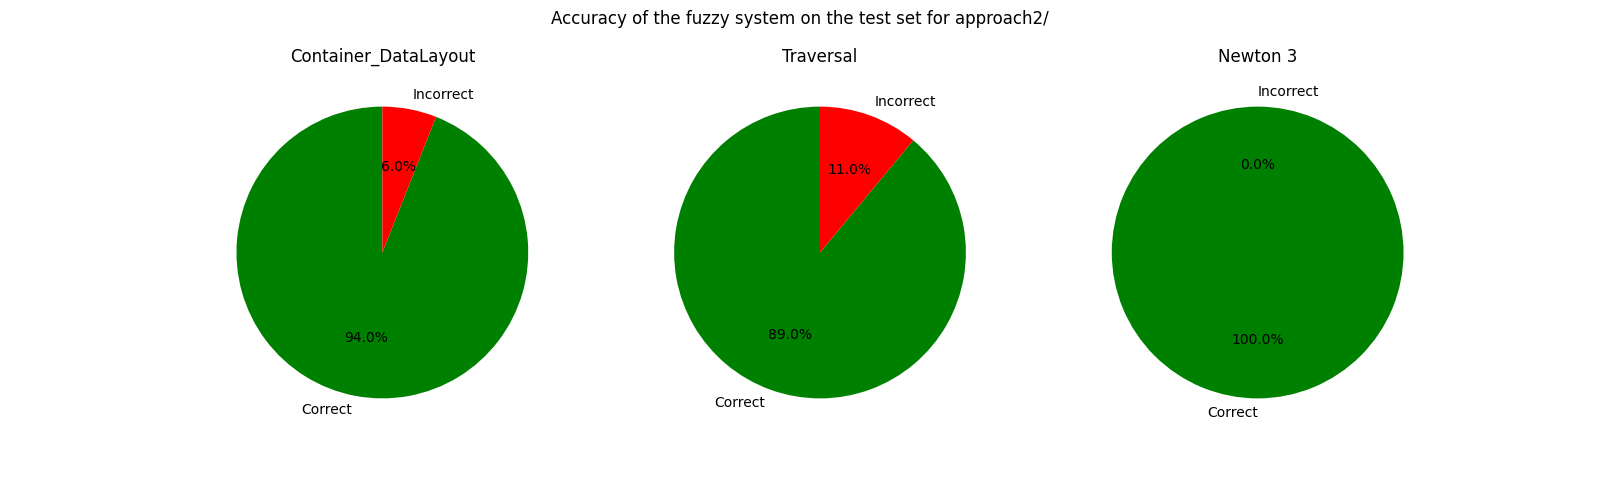

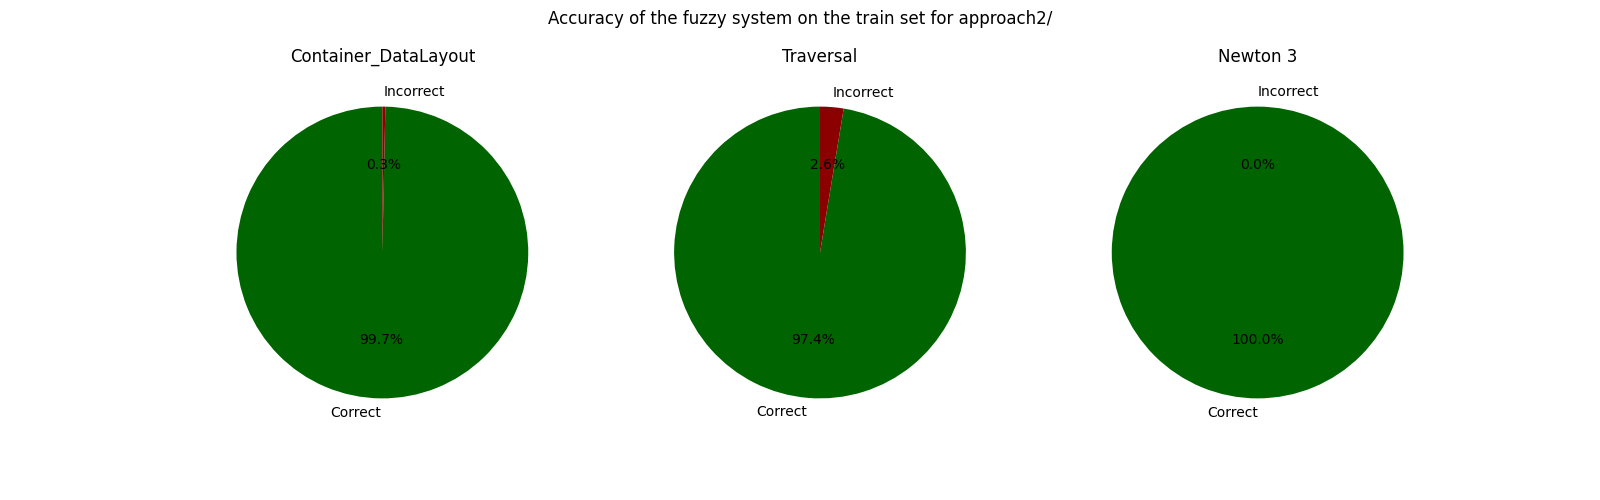

In [78]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence

fiss, algo_ranking = benchmark_rules("approach1/", train, test, K=1)
fiss, algo_ranking = benchmark_rules("approach2/", train, test, K=1)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.

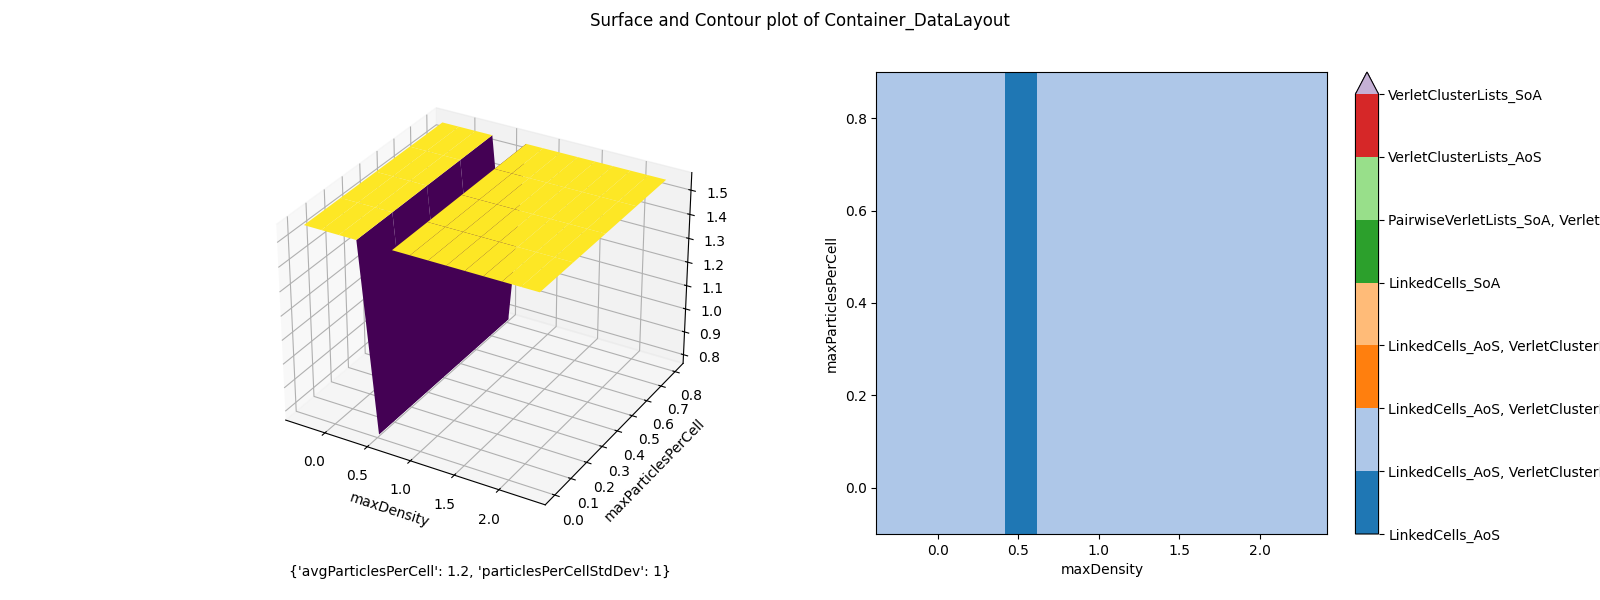

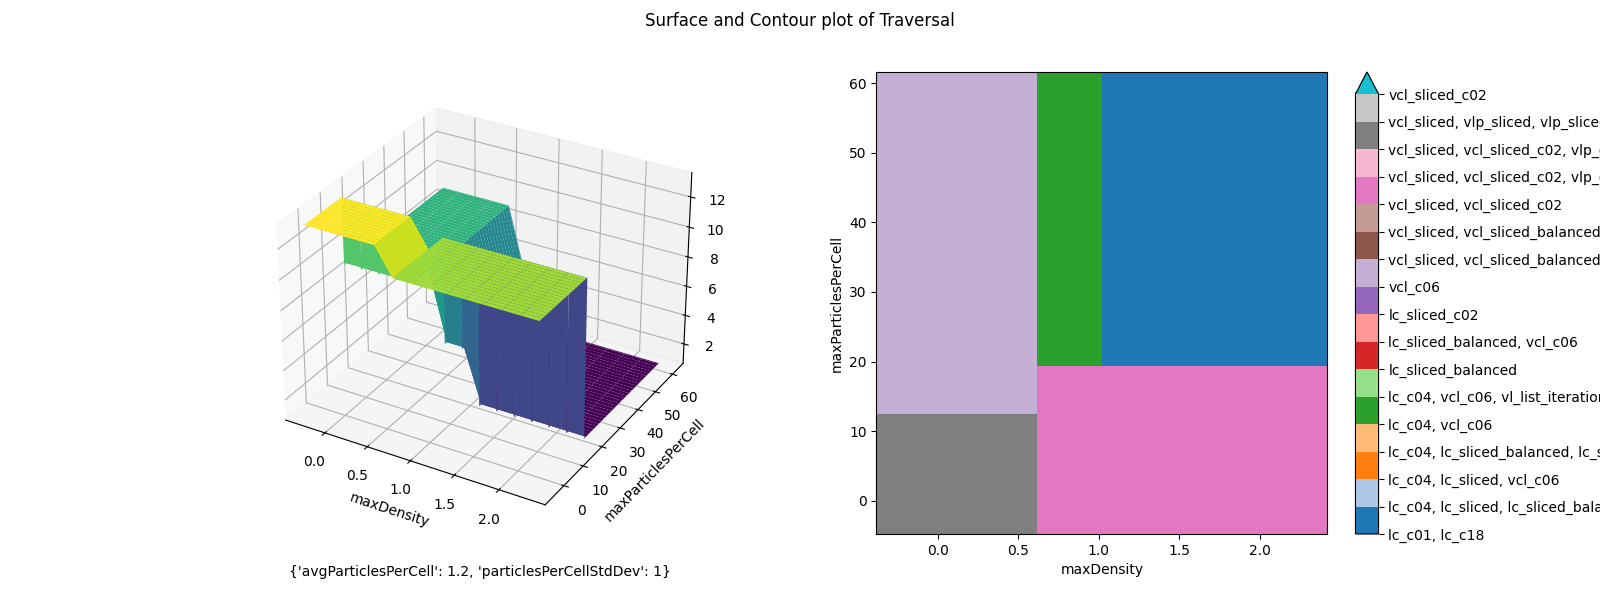

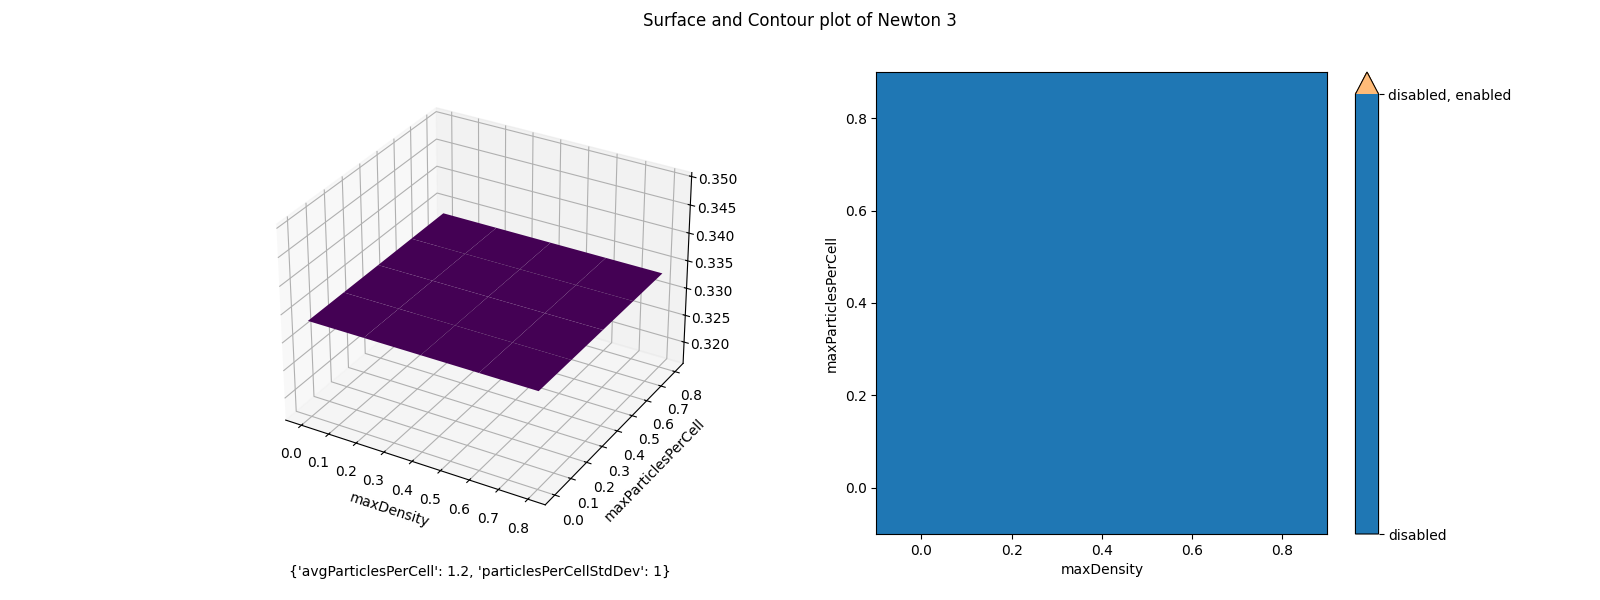

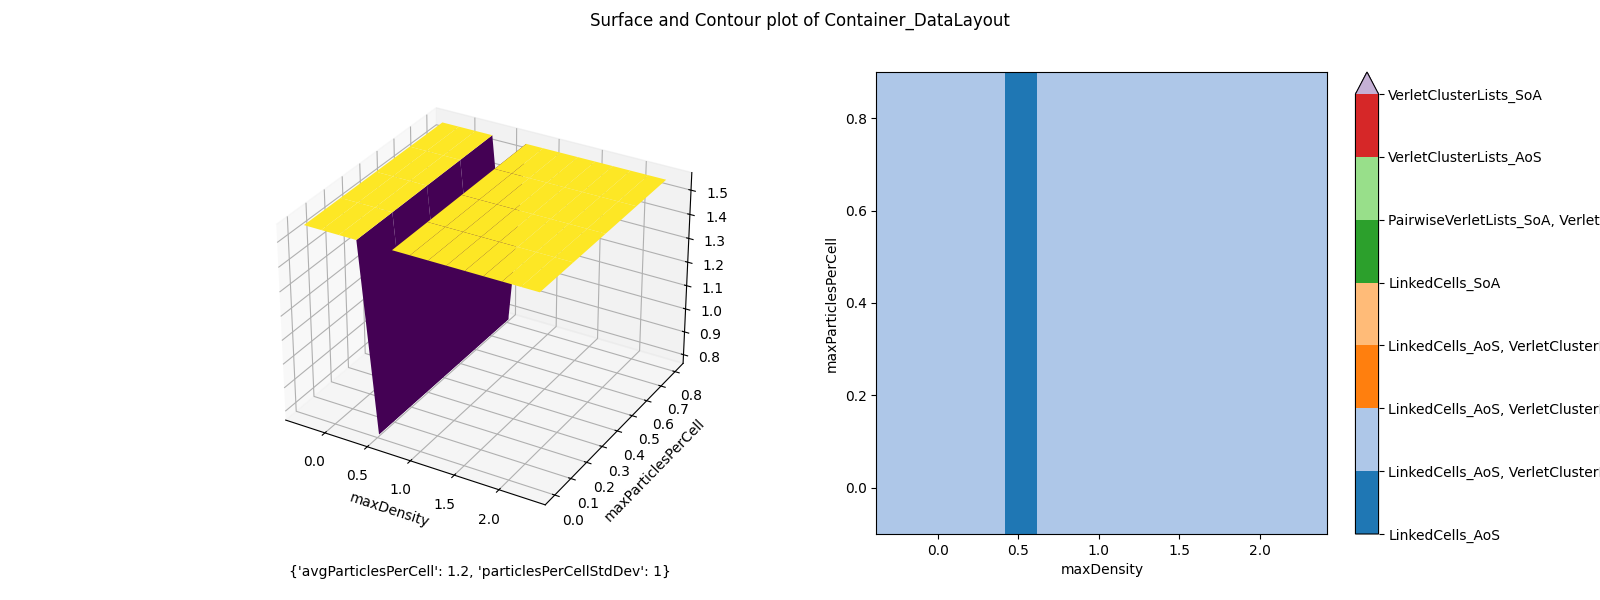

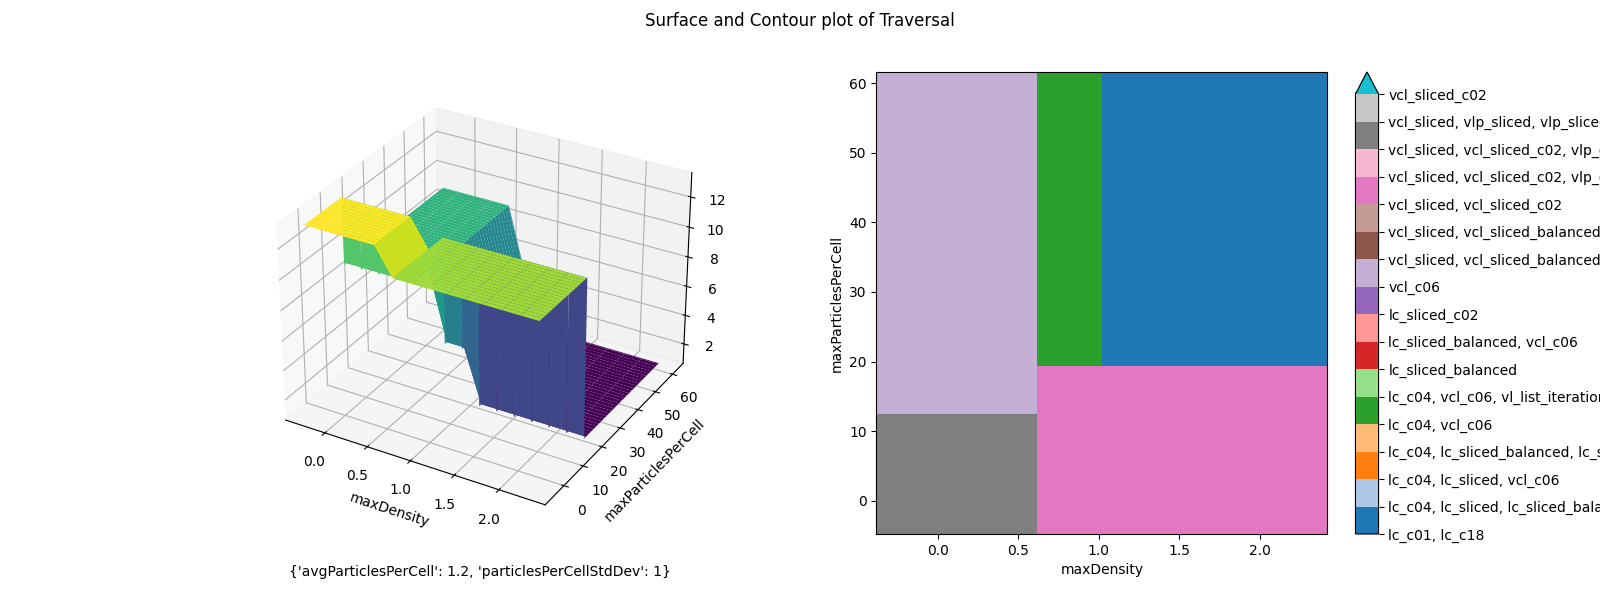

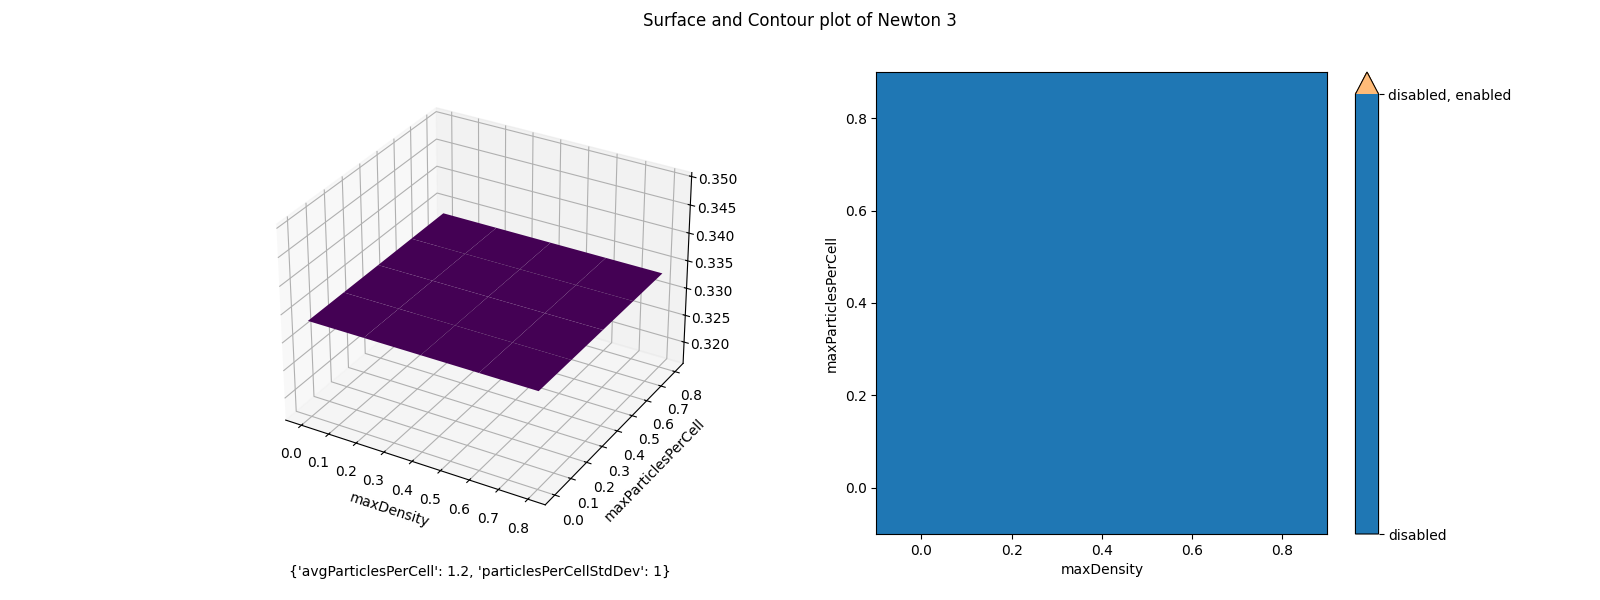

In [85]:
for fis in fiss.values():
    dim = fis.consequent_name
    label_map = {}
    for algo, value in algo_ranking[dim].items():
        label_map[value] = algo

    plot = plot3D_surface(fis.getInputCrispSets(), lambda data: algo_ranking[dim][fis.predictClosest(
        data, algo_ranking[dim])[1]], {
        "y": "maxParticlesPerCell", "x": "maxDensity", "z": dim}, labelMap=label_map, delta=0.2, fixed_values={"avgParticlesPerCell": 1.2, "particlesPerCellStdDev": 1})
    plot.show()

Union:  "("("("("(Traversal is "lc_c04, vcl_c06": Gaussian(4.444444444444445, 0.0522875816993464))↑0.00" or "(Traversal is "vcl_c06": Gaussian(8.88888888888889, 0.0522875816993464))↑0.08")" or "(Traversal is "vcl_sliced, vcl_sliced_c02": Gaussian(11.555555555555555, 0.0522875816993464))↑0.00")" or "(Traversal is "vcl_sliced, vcl_sliced_c02, vlp_c08, vlp_c18, vlp_sliced, vlp_sliced_balanced, vlp_sliced_c02": Gaussian(13.333333333333332, 0.0522875816993464))↑0.92")" or "(Traversal is "lc_c01, lc_c18": Gaussian(0.8888888888888888, 0.0522875816993464))↑0.00")"
Prediction:  vcl_sliced, vcl_sliced_c02, vlp_c08, vlp_c18, vlp_sliced, vlp_sliced_balanced, vlp_sliced_c02


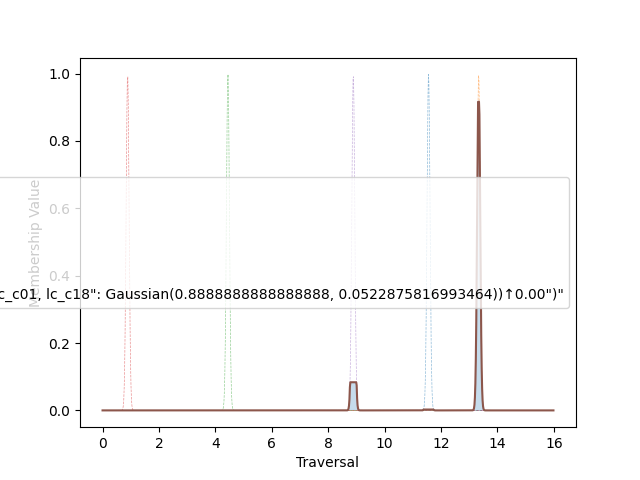

In [87]:
data = {"maxDensity": 0.2, "maxParticlesPerCell": 5}


union = fiss["Traversal"].applyRules(data)

fig, ax = plt.subplots()
union.plot(ax=ax)

print("Union: ", union)

prediction=fiss["Traversal"].predictClosest(data, algo_ranking["Traversal"],delta=0.01)[1]

print("Prediction: ", prediction)